# Linear Regression for Predicting Yearly Amount Spent

This project demonstrates the application of Linear Regression to predict the Yearly Amount Spent by customers based on various features, such as Avg. Session Length, Time on App, Time on Website, and Length of Membership. The analysis involves exploratory data analysis (EDA), model training, evaluation, and residual analysis.

## 1. Data Exploration

The dataset contains customer information, including the following features:

- **Avg. Session Length**: The average duration of a customer’s session.
- **Time on App**: The time spent by the customer on the app.
- **Time on Website**: The time spent on the website.
- **Length of Membership**: The duration of the customer’s membership with the company.
- **Yearly Amount Spent**: The target variable, indicating how much money a customer spends annually.

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import scipy.stats as stats

In [2]:
# Reading the dataset

filePath = '/Users/ahmedehab/Desktop/Linear Regression in Python/ecommerce.csv'
df = pd.read_csv(filePath)

df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Dataset Overview
The dataset contains information about customer behavior and spending on an e-commerce platform. The target variable is `Yearly Amount Spent`, and features include session length, time spent on the app/website, and membership length.


In [3]:
# Overview of the dataset structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
# Descriptive statistics for numerical columns

df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## 2. Data Visualization

Before building the model, it's essential to understand the relationships between variables. We use Seaborn to create visualizations.

### Jointplot: Time on Website vs Yearly Amount Spent

A Jointplot helps us examine the relationship between **Time on Website** and **Yearly Amount Spent**. It reveals no clear linear correlation between these variables.


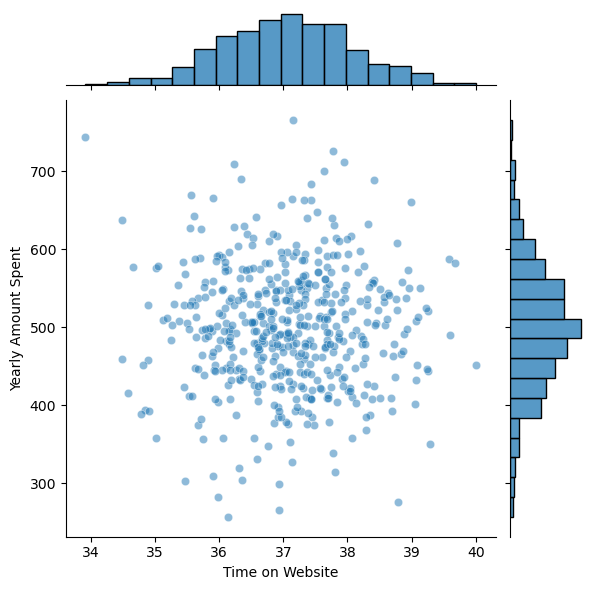

In [5]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent', data=df ,alpha=0.5)

### Jointplot: Time on App vs Yearly Amount Spent

Similarly, the relationship between **Time on App** and **Yearly Amount Spent** is also explored.


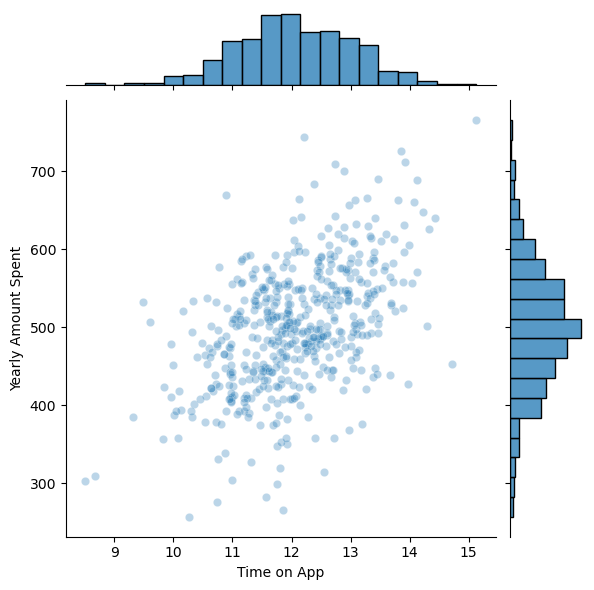

In [6]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data=df ,alpha = 0.3)

### Pairplot: All Features vs Yearly Amount Spent

A **Pairplot** is used to visualize how all features relate to **Yearly Amount Spent**. This helps us to inspect correlations between multiple variables.


/Users/ahmedehab/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


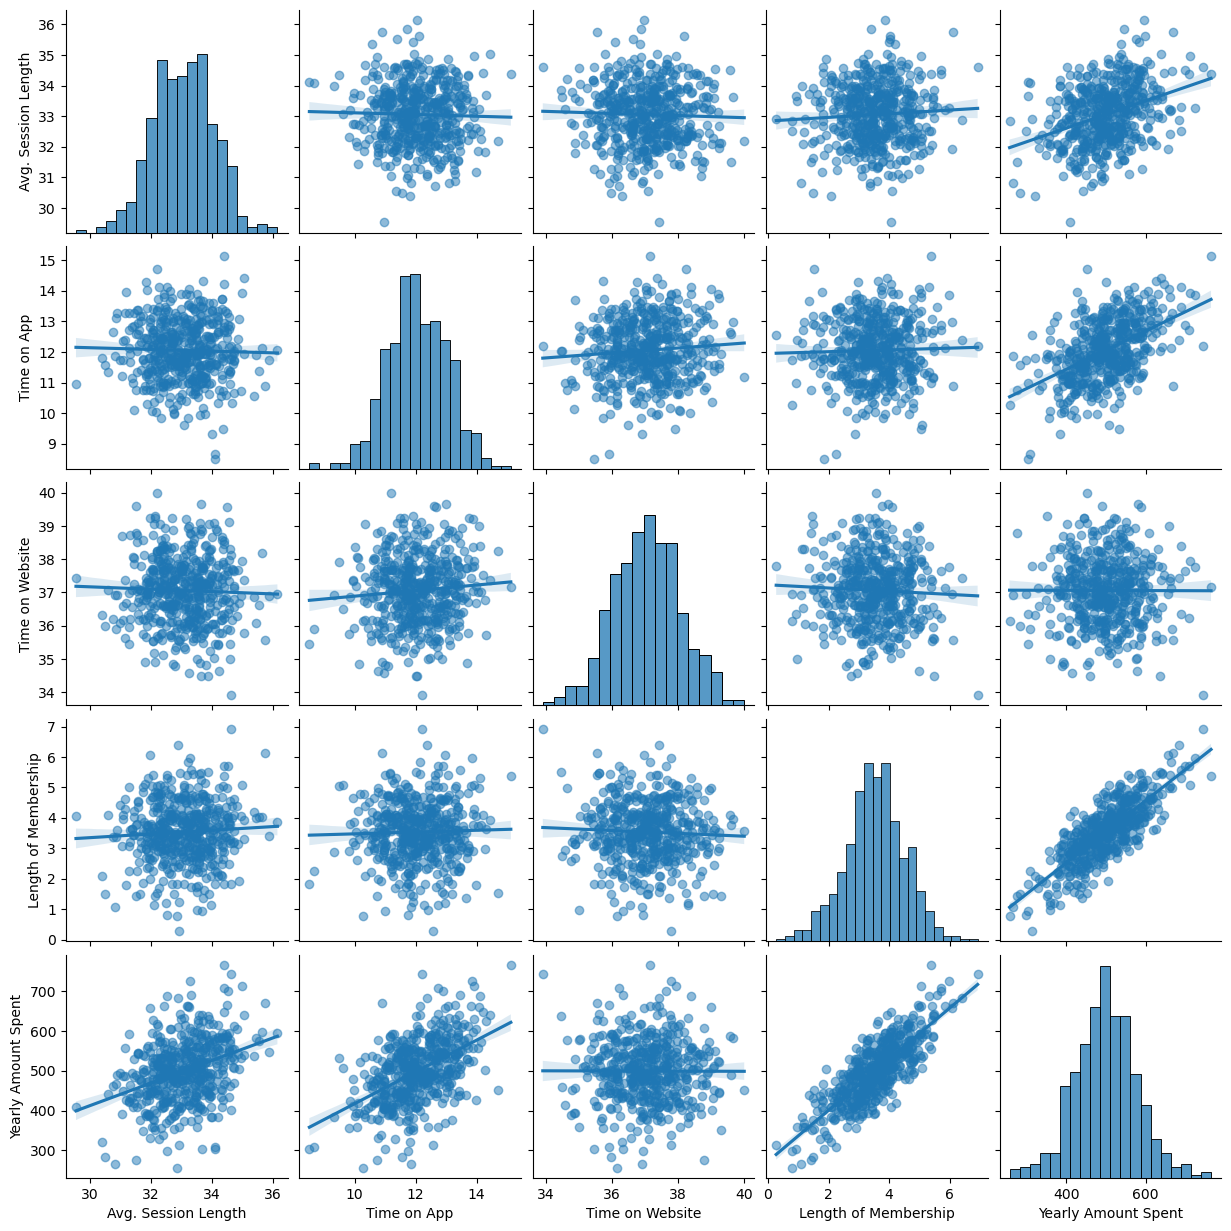

In [7]:
sns.pairplot(df,kind='reg',plot_kws={'scatter_kws': {'alpha': 0.5}})

### Evaluation of Pairplot

The pairplot visualizes the relationships between features and **Yearly Amount Spent**. Here’s a summary of the trends:

#### 1. Diagonal Histograms:
- **Avg. Session Length**: Normal distribution, peaking around 33 minutes.
- **Time on App**: Slightly right-skewed, peak at 11 minutes.
- **Time on Website**: Uniform distribution, values between 30-40 minutes.
- **Length of Membership**: Right-skewed, mostly between 1-4 years.
- **Yearly Amount Spent**: Peaks around 400, indicating most customers spend around this amount.

#### 2. Off-Diagonal Scatter Plots:
- **Avg. Session Length vs Yearly Amount Spent**: Weak positive correlation.
- **Time on App vs Yearly Amount Spent**: Stronger positive correlation, suggesting more time on the app leads to higher spending.
- **Time on Website vs Yearly Amount Spent**: Weak correlation.
- **Length of Membership vs Yearly Amount Spent**: Clear positive correlation, indicating longer membership leads to higher spending.

#### 3. Correlation Insights:
- **Time on App and Length of Membership**: Moderate positive correlation.
- **Avg. Session Length and Time on Website**: Little to no correlation.

#### Conclusion:
The pairplot highlights that **Time on App** and **Length of Membership** are the strongest predictors of yearly spending, while **Time on Website** has a weaker impact. Focusing on app engagement and customer retention could improve spending.


## 3. Preparing Data for the Model

We select the following features and target variable:

- **Features**: Avg. Session Length, Time on App, Time on Website, Length of Membership
- **Target Variable**: Yearly Amount Spent



In [8]:
x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

The data is then split into training and testing sets with a 70% training and 30% testing ratio.


In [9]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3,random_state=42)

## 4. Building the Linear Regression Model

We initialize the **Linear Regression** model and train it using the training data.


In [10]:
lm = LinearRegression()

In [11]:
lm.fit(x_train,y_train)

LinearRegression()

We then display the **coefficients** of the model for each feature.


In [12]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['coef'])
print(cdf)

                           coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


## 5. Making Predictions

We use the trained model to make predictions on the test data.


In [13]:
prediction = lm.predict(x_test)
prediction

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

We visualize the **predicted vs actual values** using a scatter plot.


Text(0.5, 1.0, 'Evaluation of ML Module')

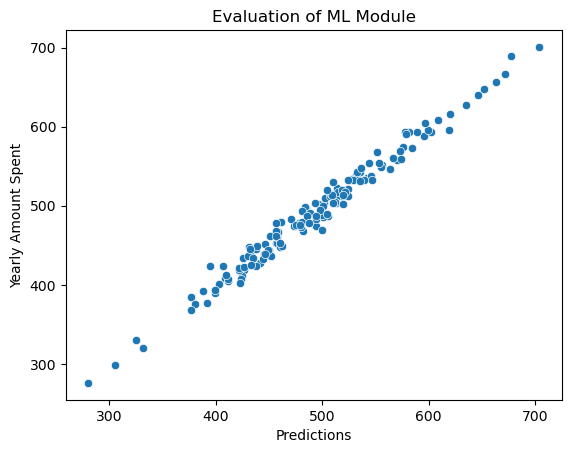

In [14]:
sns.scatterplot(x=prediction,y=y_test)
plt.xlabel('Predictions')
plt.title('Evaluation of ML Module')

## 6. Model Evaluation

We calculate the performance of the model using various error metrics:

- **Mean Absolute Error (MAE)**: The average of the absolute errors.
- **Mean Squared Error (MSE)**: The average of the squared errors.
- **Root Mean Squared Error (RMSE)**: The square root of MSE.


In [15]:
print("Mean Absolute Error: ",mean_absolute_error(y_test,prediction))
print("Mean Squared Error: ",mean_squared_error(y_test,prediction))
print("RMSE: ",math.sqrt(mean_squared_error(y_test,prediction)))

Mean Absolute Error:  8.42609164143211
Mean Squared Error:  103.9155413650334
RMSE:  10.193897260863158


## 9. Residuals Analysis

Residuals are the differences between the actual values and the predicted values. Analyzing residuals helps us assess if the model is a good fit.

We create a **histogram of the residuals** to check their distribution.


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

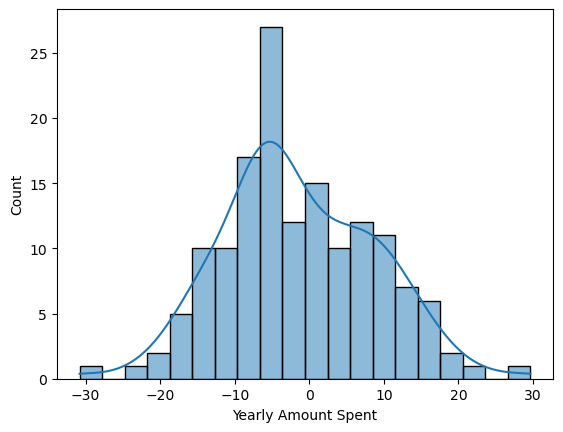

In [16]:
residuals = y_test - prediction
sns.histplot(residuals,bins=20,kde=True)

Finally, we plot the Q-Q plot of the residuals to check for normality.

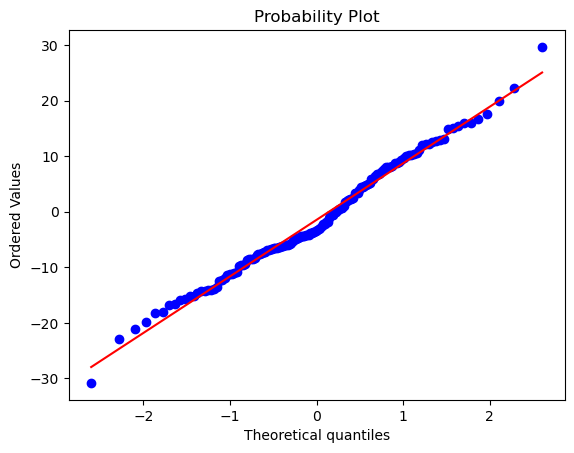

In [17]:
stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

## Conclusion

In this notebook, we explored the relationships between various features such as **Avg. Session Length**, **Time on App**, **Time on Website**, **Length of Membership**, and **Yearly Amount Spent** using a pairplot. Here’s a summary of the key takeaways:

### Feature Distributions:
- The features generally exhibit clear patterns, with **Avg. Session Length** and **Yearly Amount Spent** following somewhat normal distributions, while others like **Time on App** and **Length of Membership** are slightly skewed.

### Key Relationships:
- The strongest positive correlation was found between **Length of Membership** and **Yearly Amount Spent**, suggesting that longer memberships are associated with higher spending.
- A moderate positive correlation exists between **Time on App** and **Yearly Amount Spent**, indicating that app engagement plays a significant role in driving spending.
- **Time on Website** shows a weaker relationship with spending, suggesting that this factor may not significantly affect customer expenditures.
- There is little to no correlation between **Avg. Session Length** and **Time on Website**, indicating these features do not influence each other.

### Actionable Insights:
- Focus on increasing user engagement on the app and fostering longer membership durations to drive higher annual spending.
- Further explore the factors influencing **Time on App** and **Length of Membership** to optimize user retention and increase overall revenue.

This exploratory analysis sets the foundation for more in-depth modeling and could provide valuable insights into improving customer engagement strategies.

## Model Evaluation

After applying a predictive model to assess the relationship between these features and **Yearly Amount Spent**, we evaluated its performance using the following metrics:

- **Mean Absolute Error (MAE)**: 8.43
- **Mean Squared Error (MSE)**: 103.92
- **Root Mean Squared Error (RMSE)**: 10.19

These errors suggest that the model's predictions are relatively close to the actual values but leave room for improvement. The RMSE value indicates the average magnitude of the error is around 10.19 units of **Yearly Amount Spent**, which may still affect the model's reliability in certain use cases.

### Model Accuracy:
If accuracy was calculated (depending on the type of model used), the model's performance would be quantified by how often it correctly predicted the outcomes within an acceptable error margin. The accuracy score can provide further insights into how well the model generalizes.

To further improve the model's predictions, exploring advanced regression techniques, feature engineering, or additional data transformations could be beneficial. Additionally, tuning hyperparameters and evaluating the model on unseen data would provide a clearer understanding of its potential for real-world applications.
